In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.measure import moments, moments_hu
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from collections import Counter  
from sklearn.metrics import confusion_matrix, accuracy_score

In [10]:
df = pd.read_csv('mnist_train.csv')
data = np.array(df)
X = data[:, 1:] / 255.0 
y = data[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.9715


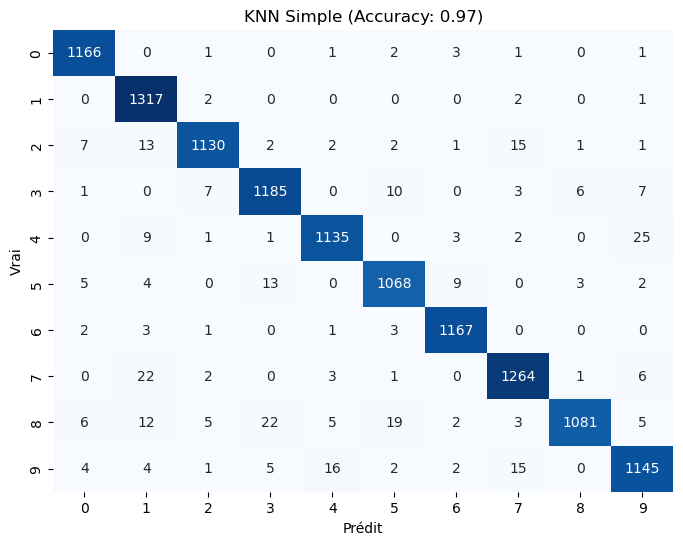

In [11]:
knn_basic = KNeighborsClassifier(n_neighbors=5)
knn_basic.fit(X_train, y_train)
y_pred_basic = knn_basic.predict(X_test)


acc_basic = accuracy_score(y_test, y_pred_basic)
print(f"Accuracy: {acc_basic:.4f}")


plt.figure(figsize=(8, 6))
cm_basic = confusion_matrix(y_test, y_pred_basic)
sns.heatmap(cm_basic, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'KNN Simple (Accuracy: {acc_basic:.2f})')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()

Moments de Hu pour le chiffre '3':
[4.10300000e+04 1.18547688e+09 3.44029188e+11 7.25991896e+11
 3.62806091e+23 2.49940643e+16 3.54527422e+21]


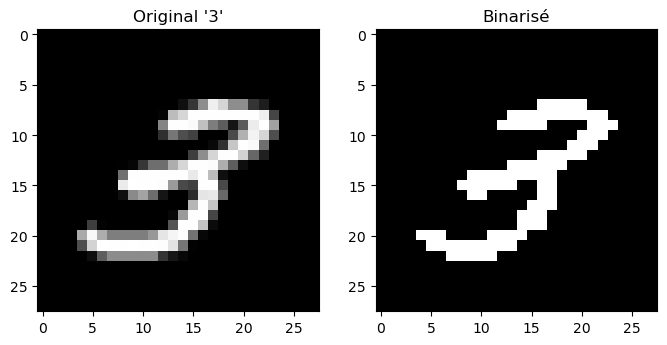


Accuracy globale: 0.2567


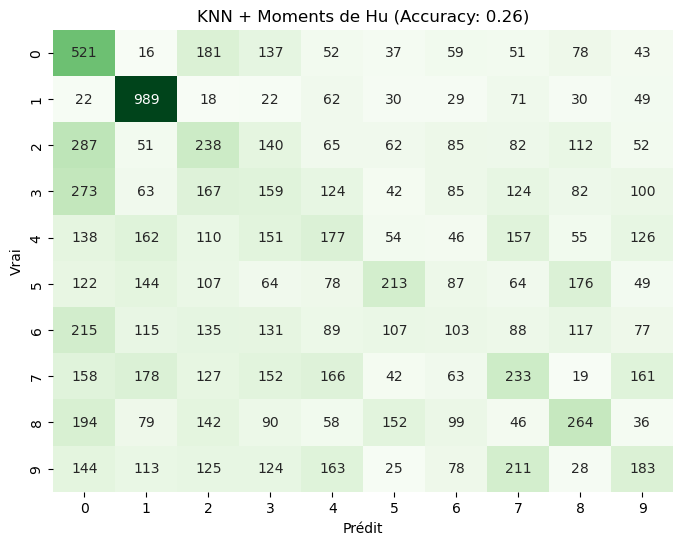

In [12]:
def extract_hu_moments(X):
    return np.array([moments_hu(moments((x.reshape(28, 28) > 0.5).astype(np.uint8))) for x in X])


sample_idx = 5  
image_sample = X_train[sample_idx].reshape(28, 28)
binary_sample = (image_sample > 0.5).astype(np.uint8)
hu_sample = moments_hu(moments(binary_sample))
digit_sample = y_train[sample_idx]

print(f"Moments de Hu pour le chiffre '{digit_sample}':\n{np.round(hu_sample, 6)}")


plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(image_sample, cmap='gray'), plt.title(f"Original '{digit_sample}'")
plt.subplot(122), plt.imshow(binary_sample, cmap='gray'), plt.title("Binarisé")
plt.show()


X_train_hu = extract_hu_moments(X_train)
X_test_hu = extract_hu_moments(X_test)


knn_hu = KNeighborsClassifier(n_neighbors=5)
knn_hu.fit(X_train_hu, y_train)
y_pred_hu = knn_hu.predict(X_test_hu)


acc_hu = accuracy_score(y_test, y_pred_hu)
print(f"\nAccuracy globale: {acc_hu:.4f}")


plt.figure(figsize=(8, 6))
cm_hu = confusion_matrix(y_test, y_pred_hu)
sns.heatmap(cm_hu, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title(f'KNN + Moments de Hu (Accuracy: {acc_hu:.2f})')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()

Accuracy: 0.9730
Nombre de composantes PCA: 154


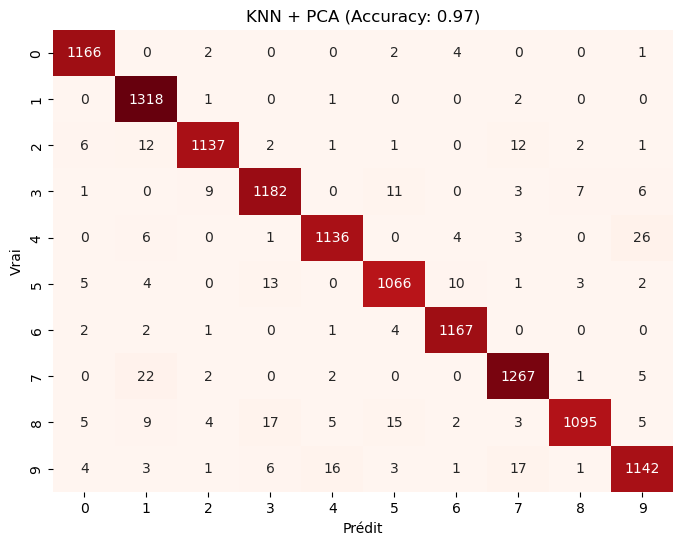

In [13]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)


acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy: {acc_pca:.4f}")
print(f"Nombre de composantes PCA: {pca.n_components_}")


plt.figure(figsize=(8, 6))
cm_pca = confusion_matrix(y_test, y_pred_pca)
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title(f'KNN + PCA (Accuracy: {acc_pca:.2f})')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()

In [14]:

print(f"{'KNN Simple :  '} {acc_basic:>10.4f}")
print(f"{'KNN + Hu :'} {acc_hu:>10.4f}")
print(f"{'KNN + PCA  :'} {acc_pca:>10.4f}")

KNN Simple :       0.9715
KNN + Hu :     0.2567
KNN + PCA  :     0.9730


In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


class CustomKNN:
    def __init__(self, k=5):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X_test):
        predictions = []
        for x in X_test:
           
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
            
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
           
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        return np.array(predictions)

----------------
A. KNN PERSONNALISÉ SUR PIXELS BRUTS-----------------
Accuracy: 0.9900


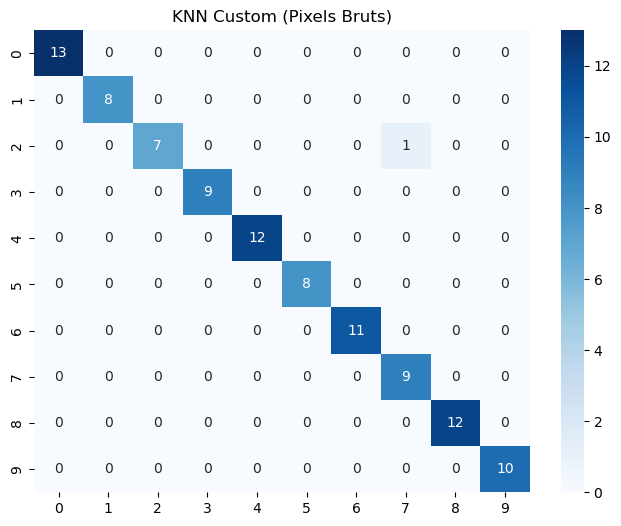

In [16]:
print("\nA. KNN PERSONNALISÉ SUR PIXELS BRUTS".center(70, '-'))
knn_custom = CustomKNN(k=5)
knn_custom.fit(X_train, y_train)
y_pred_custom = knn_custom.predict(X_test[:100])  

acc_custom = np.mean(y_pred_custom == y_test[:100])
print(f"Accuracy: {acc_custom:.4f}")

plt.figure(figsize=(8, 6))
cm_custom = confusion_matrix(y_test[:100], y_pred_custom)
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Custom (Pixels Bruts)')
plt.show()


Accuracy: 0.2200


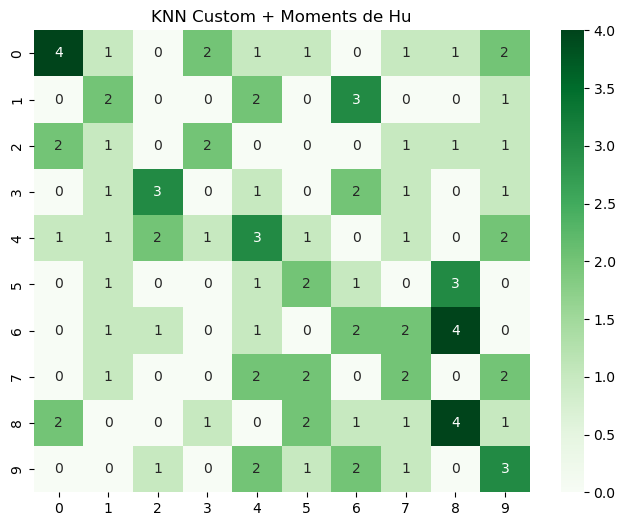

In [17]:

def extract_hu(X):
    return np.array([moments_hu(moments((x.reshape(28,28) > 0.5).astype(np.uint8))) for x in X])

X_train_hu = extract_hu(X_train)
X_test_hu = extract_hu(X_test)


knn_hu_custom = CustomKNN(k=5)
knn_hu_custom.fit(X_train_hu, y_train)
y_pred_hu_custom = knn_hu_custom.predict(X_test_hu[:100])


acc_hu_custom = np.mean(y_pred_hu_custom == y_test[:100])
print(f"Accuracy: {acc_hu_custom:.4f}")


plt.figure(figsize=(8, 6))
cm_hu_custom = confusion_matrix(y_test[:100], y_pred_hu_custom)
sns.heatmap(cm_hu_custom, annot=True, fmt='d', cmap='Greens')
plt.title('KNN Custom + Moments de Hu')
plt.show()

Accuracy: 0.9800
Nombre de composantes PCA: 154


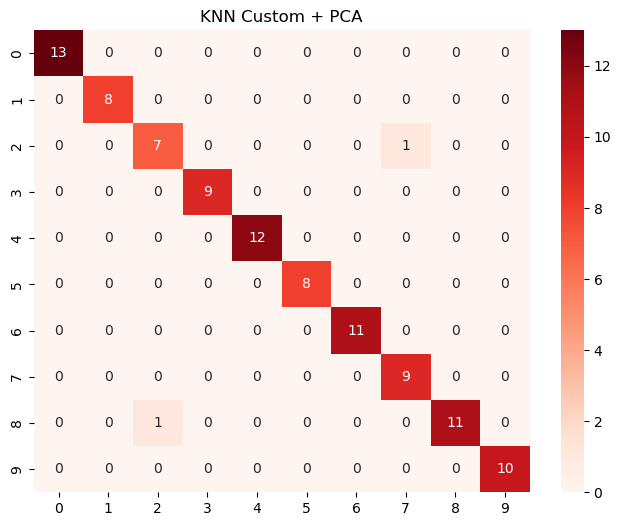

In [18]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


knn_pca_custom = CustomKNN(k=5)
knn_pca_custom.fit(X_train_pca, y_train)
y_pred_pca_custom = knn_pca_custom.predict(X_test_pca[:100])


acc_pca_custom = np.mean(y_pred_pca_custom == y_test[:100])
print(f"Accuracy: {acc_pca_custom:.4f}")
print(f"Nombre de composantes PCA: {pca.n_components_}")


plt.figure(figsize=(8, 6))
cm_pca_custom = confusion_matrix(y_test[:100], y_pred_pca_custom)
sns.heatmap(cm_pca_custom, annot=True, fmt='d', cmap='Reds')
plt.title('KNN Custom + PCA')
plt.show()

In [19]:

print(f"{'KNN Simple':<20} {acc_custom:>10.4f}")
print(f"{'KNN + Hu':<20} {acc_hu_custom:>10.4f}")
print(f"{'KNN + PCA':<20} {acc_pca_custom:>10.4f}")

KNN Simple               0.9900
KNN + Hu                 0.2200
KNN + PCA                0.9800
